# Esercitazione 1

## Esercizio 1.1

## Punto 1

Valuto come varia la stima della media (con relativa varianza, calcolata a blocchi) al variare del numero di valori considerati di una variabile casuale r estratta tra 0 e 1. Nel grafico rappresento il valore medio di r al variare del numero di blocchi considerati.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

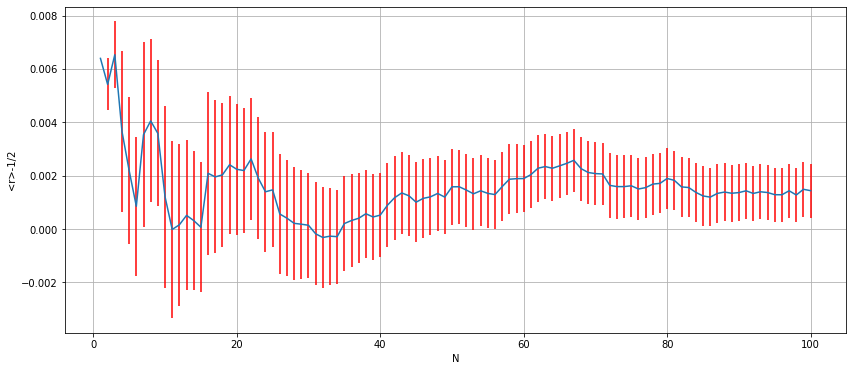

In [2]:
Nblocks,mean,var = np.loadtxt('es01_1/es1_1.out', usecols=(0,1,2), delimiter=',', unpack='true')
plt.figure(figsize=(14,6))
plt.errorbar(Nblocks,mean-0.5,yerr= var**0.5, ecolor='red')
plt.xlabel('N')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.show()

### Punto 2

Osservo ora l'andamento dell'estimatore $ \sigma^2 = <(r-0.5)^2>$, che ha valore di aspettazione $1/12$. Come in precedenza, utilizzo il metodo a blocchi e mostro il grafico della quantità al variare del numero di blocchi N.

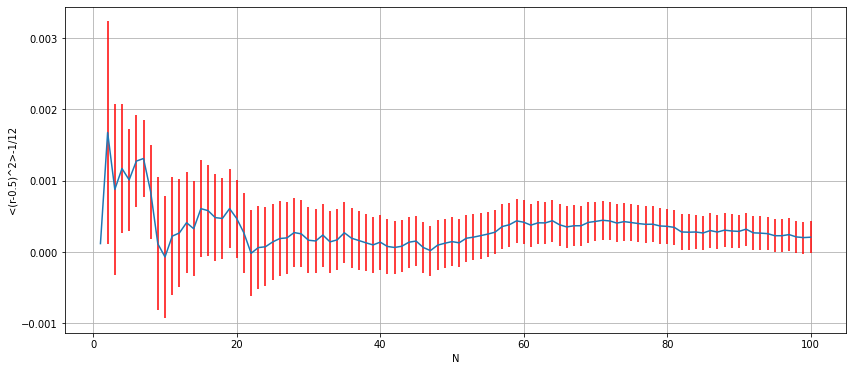

In [3]:
Nblocks,mean,var = np.loadtxt('es01_1/es1_2.out', usecols=(0,1,2), delimiter=',', unpack='true')
plt.figure(figsize=(14,6))
plt.errorbar(Nblocks, mean-1/12., yerr=var**0.5, ecolor = 'red')
plt.xlabel('N')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.grid(True)
plt.show()

### Punto 3

Eseguo un test del $\chi^2$, realizzando 100 esperimenti indipendenti.

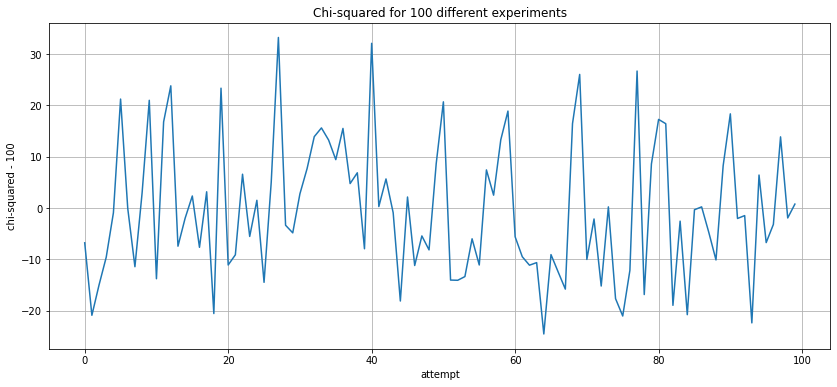

In [4]:
chi_squared = np.loadtxt('es01_1/es1_3.out', usecols=(0), delimiter=',', unpack='true')

n = np.arange(100)
plt.figure(figsize=(14,6))
plt.title('Chi-squared for 100 different experiments')
plt.plot(n,chi_squared-100)
plt.ylabel('chi-squared - 100')
plt.xlabel('attempt')
plt.grid(True)
plt.show()

Osservo come il valore dei $\chi^2$ calcolati ha circa media 100, seppur con fluttuazioni anche significative.

## Esercizio 1.2

Nella mia libreria _random.cpp_ ho aggiunto delle funzioni per campionare le variabili random seguendo un'esponenziale o una distribuzione di Cauchy-Lorentz. 

Per la distribuzione esponenziale $p(x) = \lambda \exp(-\lambda x)$, utilizzando il metodo dell'inversa della cumulativa ottengo:

$$
F(x)=\int_{0}^x  \lambda \exp(-\lambda x) dx = \exp(-\lambda x) = r 
\\ \Rightarrow x = -\frac{1}{\lambda} log(r)
$$

Per la distribuzione di Cauchy $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$:

$$
F(x)=\int_{-\infty}^x = \frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}dx 
\\ \Rightarrow x = \Gamma \ tan (\pi (r-\frac{1}{2}))
$$

Per la distribuzione Gaussiana invece utilizzo un metodo Box-Muller.

Di seguito rappresento i grafici per la sommatoria $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ al variare del numero di termini N di tale sommatoria. 

Caso N=1
         Uniform                           Exponential                           Cauchy-Lorentz


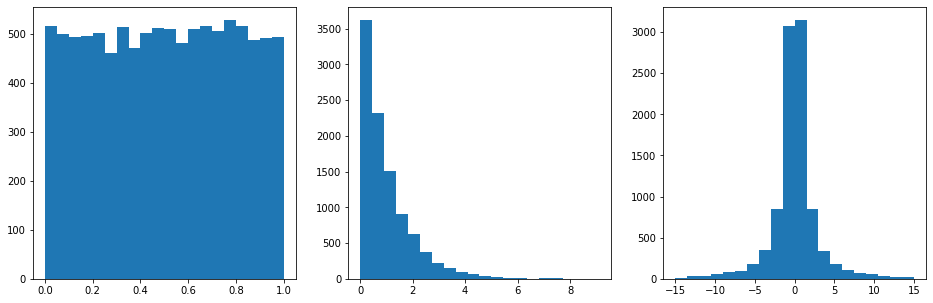

In [5]:
#N=1
uniform, expo, lorentz = np.loadtxt('es01_2/es2_1.txt', usecols=(0,1,2), delimiter=',', unpack='true')

fig, (a1,a2,a3) = plt.subplots(nrows=1, ncols=3, figsize=(16,5))
a1.hist(uniform, bins=20)
a2.hist(expo, bins=20)
a3.hist(lorentz, bins=20, range=(-15,15))

print ('Caso N=1')
print ('         Uniform                           Exponential                           Cauchy-Lorentz')

plt.show()

Caso N=2 

         Uniform                           Exponential                           Cauchy-Lorentz


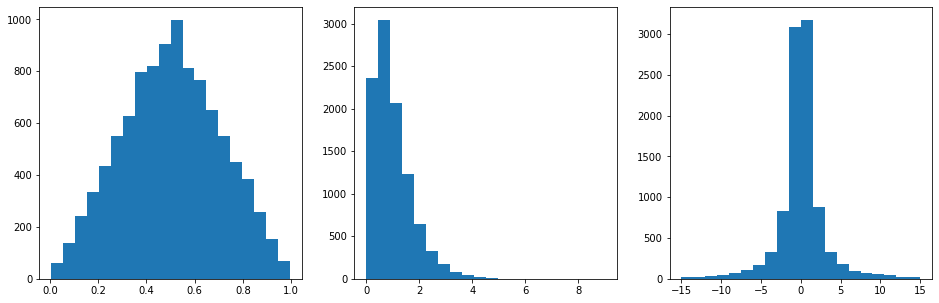

In [6]:
#N=2
uniform, expo, lorentz = np.loadtxt('es01_2/es2_2.txt', usecols=(0,1,2), delimiter=',', unpack='true')

fig, (a1,a2,a3) = plt.subplots(nrows=1, ncols=3, figsize=(16,5))
a1.hist(uniform, bins=20)
a2.hist(expo, bins=20)
a3.hist(lorentz, bins=20, range=(-15,15))

print ('Caso N=2 \n')
print ('         Uniform                           Exponential                           Cauchy-Lorentz')

plt.show()

Caso N=10 

      Uniform                              Exponential                           Cauchy-Lorentz


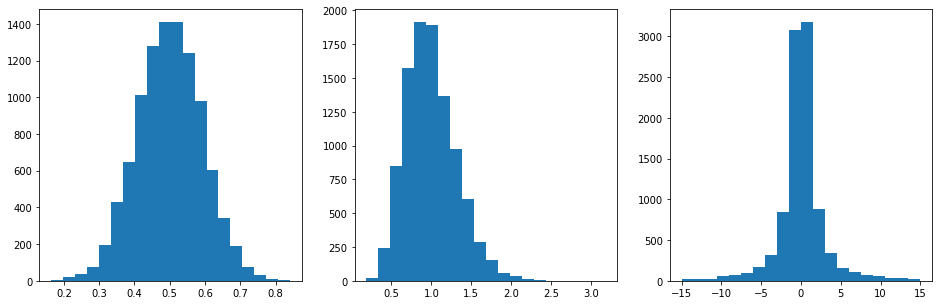

In [7]:
#N=10
uniform, expo, lorentz = np.loadtxt('es01_2/es2_10.txt', usecols=(0,1,2), delimiter=',', unpack='true')

fig, (a1,a2,a3) = plt.subplots(nrows=1, ncols=3, figsize=(16,5))
a1.hist(uniform, bins = 20)
a2.hist(expo, bins = 20)
a3.hist(lorentz, bins=20, range=(-15,15))

print ('Caso N=10 \n')
print ('      Uniform                              Exponential                           Cauchy-Lorentz')

plt.show()

Caso N=100. LA curva arancione rappresenta i fit con gaussiane o distribuzione di Cauchy
         Uniform                           Exponential                           Cauchy-Lorentz


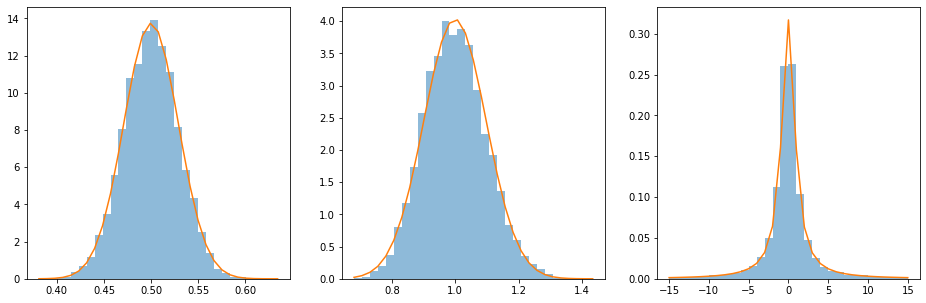

In [8]:
#N=100
from scipy.stats import norm,cauchy

uniform, expo, lorentz = np.loadtxt('es01_2/es2_100.txt', usecols=(0,1,2), delimiter=',', unpack='true')
n_bins=30

fig, (a1,a2,a3) = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

_, nbins, _ = a1.hist(uniform, n_bins, density=1, alpha=0.5)
mu, sigma = norm.fit(uniform) #gaussian fit
best_fit_line = norm.pdf(nbins, mu, sigma)
a1.plot(nbins,best_fit_line)

_, nbins, _ = a2.hist(expo, n_bins, density=1, alpha=0.5)
mu, sigma = norm.fit(expo) #gaussian fit
best_fit_line = norm.pdf(nbins, mu, sigma)
a2.plot(nbins,best_fit_line)

_, nbins, _ = a3.hist(lorentz, n_bins, density=1, alpha=0.5, range=(-15,15))
mean, var= cauchy.fit(lorentz) #fit with Cauchy distr
best_fit_line = cauchy.pdf(nbins, mean, var)
a3.plot(nbins,best_fit_line)

print ('Caso N=100. LA curva arancione rappresenta i fit con gaussiane o distribuzione di Cauchy')
print ('         Uniform                           Exponential                           Cauchy-Lorentz')

plt.show()

Ho osservato come per i dati generati con la distribuzione di Cauchy-Lorentz non sia possibile eseguire un fit gaussiano, mentre con una distribuzione di Cauchy, ovviamente, l'accordo è buono.

## Esercizio 1.3

Eseguo l'esperimento di Buffon compiendo in ogni blocco un numero di lanci del bastoncino $N_{throws}=100$ e osservo come migliora la stima di $\pi$ all'aumentare del numero di blocchi N.

Nella simulazione considero la sola direzione _x_, in quanto se le linee da intersecare sono verticali, l'unica direzione rilevante è quella orizzontale. Genero casualmente la posizione lungo x del bastoncino, con un numero random da 0 a $x_{max}$. Per simulare l'inclinazione dei bastoncini senza utilizzare la variabile $\pi$ di C++, mi avvalgo di una sorta di metodo accept-reject, dove genero una coppia di punti casuali finchè questa non cade all'interno di una circonferenza di raggio 1. Dalle coordinate di tale punto si può ricavare un angolo casuale, che sarà l'inclinazione del bastoncino. 

Calcolo quindi la proiezione del bastoncino lungo l'asse x, e considero come "hit" tutti i casi possibili in cui una delle due metà interseca le linee equispaziate. 

Di seguito il grafico del valore ottenuto al variare del numero di blocchi N, con la relativa varianza a blocchi. Considero il risultato soddisfacente. 

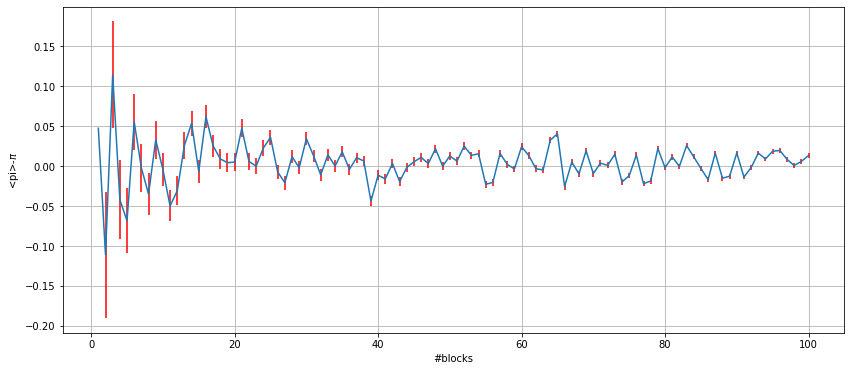

In [9]:
Nblocks, pi, var = np.loadtxt('es01_3/es3.txt', usecols=(0,1,2), delimiter=',', unpack='true')
plt.figure(figsize=(14,6))
plt.errorbar(Nblocks, pi-m.pi, marker='',yerr=var**0.5, ecolor='red')
plt.xlabel('#blocks')
plt.ylabel('<pi>-$\pi$')
plt.grid(True)
plt.show()